#### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import h5py

f = h5py.File("/content/drive/My Drive/SVHN_single_grey1.h5","r")

## Data fetching and understand the train/val/test splits.

In [5]:
f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [0]:
X_test = f['X_test'][:]
X_train = f['X_train'][:]
X_val = f['X_val'][:]
y_test = f['y_test'][:]
y_train = f['y_train'][:]
y_val = f['y_val'][:]

In [7]:
X_test.shape

(18000, 32, 32)

In [8]:
X_train.shape

(42000, 32, 32)

In [9]:
X_val.shape

(60000, 32, 32)

In [10]:
y_test.shape

(18000,)

In [11]:
y_train.shape

(42000,)

In [12]:
y_val.shape

(60000,)

# Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

In [13]:
X_train.dtype

dtype('<f4')

In [0]:
X_train =np.array(X_train).astype('float32')
X_test =np.array(X_test).astype('float32')
X_val = np.array(X_val).astype('float32')

In [15]:
X_train.dtype

dtype('float32')

In [0]:
y_train_cat=tf.keras.utils.to_categorical(y_train,num_classes=None,dtype='float32')
y_test_cat=tf.keras.utils.to_categorical(y_test,num_classes=None,dtype='float32')
y_val_cat=tf.keras.utils.to_categorical(y_val,num_classes=None,dtype='float32')

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


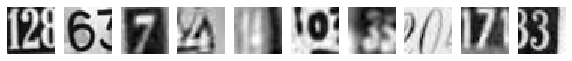

In [17]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_cat[0:10][i])))    
plt.show()

In [18]:
y_train_cat.shape

(42000, 10)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True), loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
model1.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 180us/sample - loss: 1.5191 - accuracy: 0.4961 - val_loss: 1.0346 - val_accuracy: 0.6743
Epoch 2/10
42000/42000 [==============================] - 5s 123us/sample - loss: 1.0120 - accuracy: 0.6817 - val_loss: 0.8332 - val_accuracy: 0.7466
Epoch 3/10
42000/42000 [==============================] - 5s 123us/sample - loss: 0.8619 - accuracy: 0.7314 - val_loss: 0.8424 - val_accuracy: 0.7408
Epoch 4/10
42000/42000 [==============================] - 5s 129us/sample - loss: 0.8042 - accuracy: 0.7501 - val_loss: 0.6427 - val_accuracy: 0.8048
Epoch 5/10
42000/42000 [==============================] - 5s 124us/sample - loss: 0.7317 - accuracy: 0.7731 - val_loss: 0.6539 - val_accuracy: 0.7987
Epoch 6/10
42000/42000 [==============================] - 5s 117us/sample - loss: 0.6866 - accuracy: 0.7875 - val_loss: 0.5487 - val_accuracy: 0.8339
Epoch 7/10
42000/42000 [==========================

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))
model2.add(tf.keras.layers.Dense(100, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [28]:
model2.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 137us/sample - loss: 1.5645 - accuracy: 0.4850 - val_loss: 1.0172 - val_accuracy: 0.6869
Epoch 2/10
42000/42000 [==============================] - 5s 122us/sample - loss: 1.0243 - accuracy: 0.6779 - val_loss: 0.7825 - val_accuracy: 0.7644
Epoch 3/10
42000/42000 [==============================] - 5s 122us/sample - loss: 0.8733 - accuracy: 0.7274 - val_loss: 0.6952 - val_accuracy: 0.7892
Epoch 4/10
42000/42000 [==============================] - 5s 118us/sample - loss: 0.7759 - accuracy: 0.7596 - val_loss: 0.6499 - val_accuracy: 0.8033
Epoch 5/10
42000/42000 [==============================] - 5s 123us/sample - loss: 0.7135 - accuracy: 0.7784 - val_loss: 0.5824 - val_accuracy: 0.8239
Epoch 6/10
42000/42000 [==============================] - 5s 122us/sample - loss: 0.6652 - accuracy: 0.7935 - val_loss: 0.5232 - val_accuracy: 0.8427
Epoch 7/10
42000/42000 [==========================

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model3 = tf.keras.models.Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model3.add(tf.keras.layers.Reshape((32,32,1),input_shape=(32,32,)))

#normalize data
model3.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model3.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model3.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model3.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model3.add(tf.keras.layers.Dropout(0.25))

#Output layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model3.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 320us/sample - loss: 0.8240 - accuracy: 0.7444 - val_loss: 0.4437 - val_accuracy: 0.8717
Epoch 2/10
42000/42000 [==============================] - 7s 178us/sample - loss: 0.4648 - accuracy: 0.8601 - val_loss: 0.3444 - val_accuracy: 0.8990
Epoch 3/10
42000/42000 [==============================] - 7s 177us/sample - loss: 0.3757 - accuracy: 0.8850 - val_loss: 0.2829 - val_accuracy: 0.9183
Epoch 4/10
42000/42000 [==============================] - 8s 180us/sample - loss: 0.3101 - accuracy: 0.9055 - val_loss: 0.2474 - val_accuracy: 0.9283
Epoch 5/10
42000/42000 [==============================] - 8s 181us/sample - loss: 0.2678 - accuracy: 0.9164 - val_loss: 0.2202 - val_accuracy: 0.9398
Epoch 6/10
42000/42000 [==============================] - 8s 188us/sample - loss: 0.2248 - accuracy: 0.9284 - val_loss: 0.1902 - val_accuracy: 0.9500
Epoch 7/10
42000/42000 [=========================

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model4 = tf.keras.models.Sequential()

#Reshape data from 2D (32,32) to 3D (32, 32, 1)
model4.add(tf.keras.layers.Reshape((32,32,1),input_shape=(32,32,)))



In [0]:
  #normalize data
  model4.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model4.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model4.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model4.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model4.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model4.add(tf.keras.layers.Dropout(0.25))

#Output layer
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model4.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model4.fit(X_train,y_train_cat,          
          validation_data=(X_val,y_val_cat),
          epochs=10,
          batch_size=64)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 187us/sample - loss: 1.1104 - accuracy: 0.6319 - val_loss: 0.4692 - val_accuracy: 0.8666
Epoch 2/10
42000/42000 [==============================] - 8s 179us/sample - loss: 0.4836 - accuracy: 0.8538 - val_loss: 0.3461 - val_accuracy: 0.8990
Epoch 3/10
42000/42000 [==============================] - 7s 178us/sample - loss: 0.3831 - accuracy: 0.8837 - val_loss: 0.2921 - val_accuracy: 0.9148
Epoch 4/10
42000/42000 [==============================] - 7s 178us/sample - loss: 0.3092 - accuracy: 0.9045 - val_loss: 0.2358 - val_accuracy: 0.9340
Epoch 5/10
42000/42000 [==============================] - 7s 175us/sample - loss: 0.2570 - accuracy: 0.9203 - val_loss: 0.2107 - val_accuracy: 0.9430
Epoch 6/10
42000/42000 [==============================] - 7s 177us/sample - loss: 0.2179 - accuracy: 0.9315 - val_loss: 0.1918 - val_accuracy: 0.9479
Epoch 7/10
42000/42000 [==========================

In [42]:
model1.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 1s 76us/sample - loss: 0.5812 - accuracy: 0.8272


[0.5812477804554833, 0.8271667]

In [43]:
model2.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 1s 76us/sample - loss: 0.5520 - accuracy: 0.8324


[0.5520042262077332, 0.8323889]

In [44]:
model3.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 2s 103us/sample - loss: 0.4640 - accuracy: 0.9036


[0.46396085547324684, 0.9035556]

In [45]:
model4.evaluate(x=X_test,y=y_test_cat)

18000/18000 [==============================] - 2s 94us/sample - loss: 0.4367 - accuracy: 0.9062


[0.43670883939166866, 0.9061667]

In [0]:
## Model SGD or adam with CNN is giving best accuracy 

In [0]:
## 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
class_names = ['1', '2','3','4','5','6','7','8','9','10']

In [0]:
predictions1 = model1.predict(X_test)

def plot_image1(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array1(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

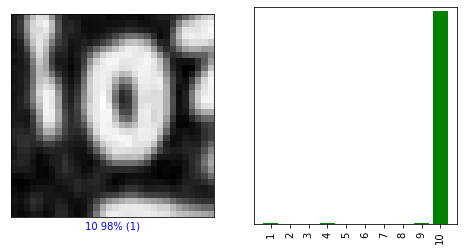

In [72]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image1(i, predictions1[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array1(i, predictions1[i],  y_train)
plt.show()

In [0]:
predictions2 = model2.predict(X_test)

def plot_image2(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array2(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

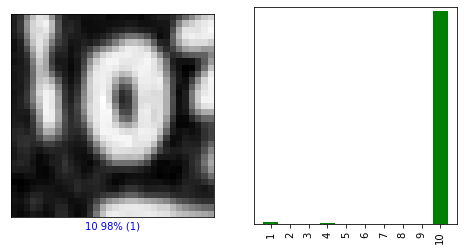

In [71]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image2(i, predictions2[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array2(i, predictions2[i],  y_train)
plt.show()

In [0]:
predictions3 = model3.predict(X_test)

def plot_image3(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array3(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

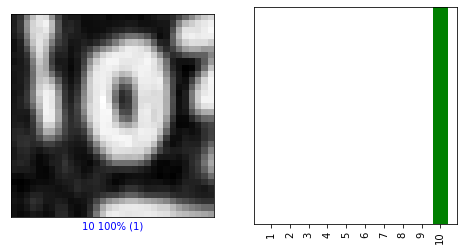

In [69]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image3(i, predictions3[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array3(i, predictions3[i],  y_train)
plt.show()

In [0]:
predictions4 = model4.predict(X_test)

def plot_image4(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array4(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='green')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

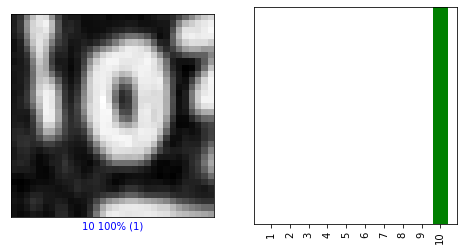

In [70]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image4(i, predictions4[i], y_train, X_train)
plt.subplot(1,2,2)
plot_value_array4(i, predictions4[i],  y_train)
plt.show()